In [1]:
%%capture
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import os
import sys

In [2]:
# I recommend that you do not change things in this cell!
url = "https://nomad-hzb-ce.de/nomad-oasis/api/v1"
token = os.environ['NOMAD_CLIENT_ACCESS_TOKEN']

sys.path.insert(1, '../python-scripts-c6fxKDJrSsWp1xCxON1Y7g')
from api_calls import *
from ce_nome_tool_box import *
sys.path.insert(1, '../nome-cp-analysis-9DYqesKJTQubOs6U82xSxA')
from cp_plots_functions import *

# CP Overview

This notebook is designed for uploads with multiple `CE_NOME_Chronopotentiometry` files.
It allows you to get an overview of all concatenated CP files and optionally you can inspect specific time intervalls. 

**Copy this notebook to one of your own uploads if you want to design your own plots.**

For interactive general plots take a look at the file `cp_plots_voila.ipynb`.

### Overview

In [3]:
# here you can do your changes
upload_name = 'CE-NOME_AmBu_240807_0003'
label_text = 'Chronopotentiometry test upload'

In [4]:
# get data from nomad and prepare data in table
data = get_specific_entrytype_of_uploads(url, token, [upload_name], 'CE_NOME_Chronopotentiometry', with_meta=False)
print_cp_overview(data)
df = get_cp_overview_dataframe(data)

Number of CP files in selected upload: 61
Timestamp first CP file: 2024-07-08T14:58:11+00:00


In [5]:
def plot_overview(df):
    plt.close()
    plt.plot(np.array(df.time)/3600, df.voltage, linestyle='solid', color='darkblue',)
    #label="$E_{\mathrm{applied}} = 250\, \mathrm{mA\, cm^{-2}}$",)
    
    # title, legend, labels
    plt.title(label_text, fontsize=18)
    #plt.legend(loc='lower right', fontsize=14)
    plt.xlabel('Time [hr]', loc='center', fontsize=14)
    plt.ylabel('Voltage [V]', loc='center', fontsize=14)
    
    # Adjust tick font size
    plt.tick_params(axis='both', which='major', labelsize=12)

    # Show figure
    plt.show()

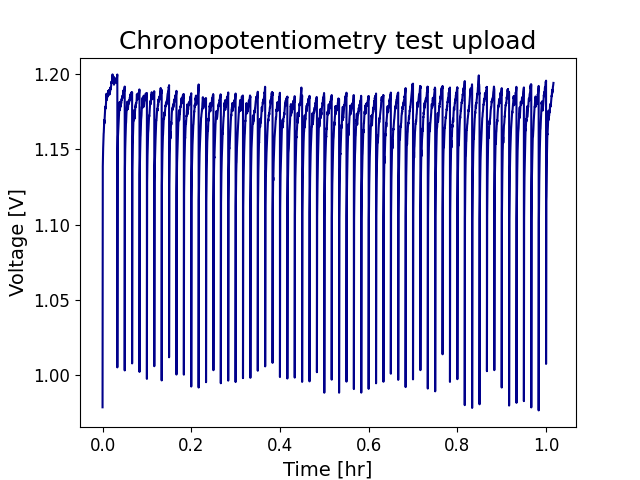

In [6]:
# plot the data
if df.empty:
    print('Please select another upload that contains entries of type CE_NOME_Chronopotentiometry.')
else:
    plot_overview(df)

### Inspect Time Intervals

In [7]:
def plot_interval(df):
    plt.figure()
    plt.plot(np.array(df.time), df.voltage, linestyle='solid', color='darkgreen',)
    plt.title(label_text, fontsize=18)
    plt.xlabel('Time [s]', loc='center', fontsize=14)
    plt.ylabel('Voltage [V]', loc='center', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

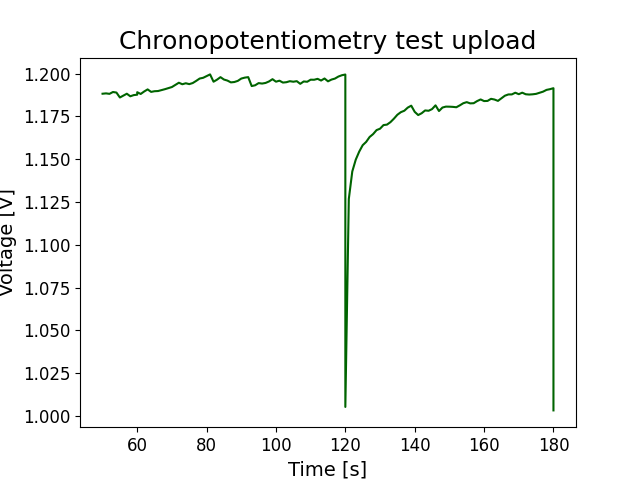

In [8]:
# here you can do your changes (time in s)
start_time = 50
end_time = 180

filtered_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
plot_interval(filtered_df)

### Save Figures or Data

In [9]:
# if you want to save the figure create a directory 'figures' in your upload and execute this cell
if os.path.exists('figures'):
    # Save figure with transparent background
    plt.savefig(f'figures/{label_text}.png', format='png', transparent=True)

In [10]:
# if you want to save the overview data table create a directory 'csv_data' in your upload and execute this cell
if os.path.exists('csv_data'):
    df.to_csv(f'csv_data/{label_text}.csv', index=False, header=True)